In [1]:
import monkdata as m
import dtree as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assignment 1: 
The fille dtree.py decnes a function entropy which
calculates the entropy of a dataset. Import this le along with the
monks datasets and use it to calculate the entropy of the training
datasets.

In [2]:
# assign data of lists.  
data = {'Entropy': np.zeros(3),}  
  
# Create DataFrame  
df_A1 = pd.DataFrame(data, index = ['Monk1', 'Monk2', 'Monk3',])
df_A1.loc['Monk1'] = dt.entropy(m.monk1)
df_A1.loc['Monk2'] = dt.entropy(m.monk2)
df_A1.loc['Monk3'] = dt.entropy(m.monk3)
df_A1

,Entropy
Monk1,1.000000
Monk2,0.957117
Monk3,0.999806


# Assignment 2: 
Explain entropy for a uniform distribution and a
non-uniform distribution, present some example distributions with
high and low entropy.

The entropy for a uniform distribution  

In [3]:
# Uniform --> Real 6-sided die
entropy_r6 = 6 * (-(1/6)*np.log2(1/6))
round(entropy_r,2)

NameError: name 'entropy_r' is not defined

In [4]:
# Non-uniform --> Fake 6-sided die 
entropy_f6 = (-5 *(0.1*np.log2(0.1)))-(0.5*np.log2(0.5))
round(entropy_f,2)

NameError: name 'entropy_f' is not defined

In [5]:
# Uniform --> Real 100-sided die
entropy_r100 = 100 * (-(1/100)*np.log2(1/100))
round(entropy_r100,10)

6.6438561898

In [6]:
# Non-uniform --> Weighted 100-side die
N = 1
M = 100 - N
pn = 0.9
pm = (1 - N*pn)/M
round(pm,5)

0.00101

In [7]:
entropy_f100 = (-M*np.log2(pm))-(N*np.log2(pn))
round(entropy_f100,2)

985.33

Text(0, 0.5, 'Entropy')

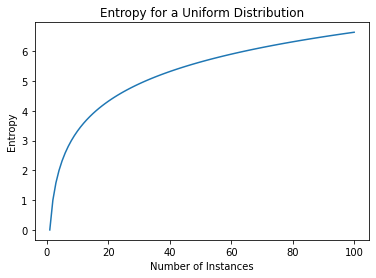

In [8]:
# entropy_x

x = range(1,101)
y = []

for i in range(100):
    N = i+1
    y.append(N * (-(1/N)*np.log2(1/N)))
    
plt.plot(x,y)

plt.title("Entropy for a Uniform Distribution")
plt.xlabel("Number of Instances")
plt.ylabel("Entropy")



    

# Assignment 3:
Use the function averageGain (defined in dtree.py) to calculate the expected information gain corresponding to each of
the six attributes. Note that the attributes are represented as instances of the class Attribute (defined in monkdata.py) which you can access via m.attributes[0], ..., m.attributes[5]. Based on the results, which attribute should be used for splitting the examples at the root node?


In [9]:
# Create a list containing the monk data
list_monk = [m.monk1, m.monk2, m.monk3]

# assign data of lists.  
data_A3 = {'a1':np.zeros(3), 'a2':np.zeros(3), 'a3':np.zeros(3), 'a4':np.zeros(3), 'a5':np.zeros(3), 'a6':np.zeros(3)}
  
# Create empty DataFrame with Monk-X Index
df_A3 = pd.DataFrame(data_A3, index = ['Monk1', 'Monk2', 'Monk3'])

# Use for loop to calculate and populate data frame with Average Gain for all three data sets and all six attributes
# Access the list of names in columns 'Monk1, Monk2, Monk3' --> df_A3.columns[i]
# Access the list of names in index 'a1, a3, a3, etc...' --> df_A3.index[j]
# Acess the datasets --> list_monk[i]
# Acess the attributres --> m.attributes[j] 

for i in range(3):
    for j in range(6):
        df_A3.loc[df_A3.index[i],df_A3.columns[j]] = dt.averageGain(list_monk[i],m.attributes[j])
df_A3

,a1,a2,a3,a4,a5,a6
Monk1,0.075273,0.005838,0.004708,0.026312,0.287031,0.000758
Monk2,0.003756,0.002458,0.001056,0.015664,0.017277,0.006248
Monk3,0.007121,0.293736,0.000831,0.002892,0.255912,0.007077


# Assignment 4
For splitting we choose the attribute that maximizes
the information gain, Eq.3. Looking at Eq.3 how does the entropy of
the subsets, Sk, look like when the information gain is maximized?
How can we motivate using the information gain as a heuristic for
picking an attribute for splitting? Think about reduction in entropy
after the split and what the entropy implies.

If we are trying to maximize the gain of Eq(3), then the second term of the equation should be minimized. Therefore, we are looking for an attribute which has quite low entropy, meaning that the attribute is predictable. Therfore, as a quick hand we can calculate 

In [10]:
df_A3.idxmax(axis=1)

Monk1    a5
Monk2    a5
Monk3    a2
dtype: object

In [11]:
df_A3.max(axis=1)

Monk1    0.287031
Monk2    0.017277
Monk3    0.293736
dtype: float64

In [12]:
# Monk1 Root Node = a5 
# Creating four subsets for monk1 
m1a5_1 = dt.select(m.monk1, m.attributes[4], 1)
m1a5_2 = dt.select(m.monk1, m.attributes[4], 2)
m1a5_3 = dt.select(m.monk1, m.attributes[4], 3)
m1a5_4 = dt.select(m.monk1, m.attributes[4], 4)

dict_m1a5 = {'m1a5_1' : m1a5_1, 'm1a5_2': m1a5_2, 'm1a5_3': m1a5_3, 'm1a5_4': m1a5_4}

# For each subset compute information gains
# Exclude attribute a5... at index 4
# Create a dictionary with keys = m1a5_x and values = list of attributes

new_dict = {}
for key, value in dict_m1a5.items():
    new_dict[key] = []
    for attribute in [m.attributes[0], m.attributes[1], m.attributes[2], m.attributes[3], m.attributes[5]]:
        new_dict[key].append(dt.averageGain(value,attribute))


split1_monk1 = pd.DataFrame.from_dict(new_dict)
split1_monk1.rename(index= {0:1, 1:2, 2:3, 3:4, 4:6})

# for i in range(4):
#     for j in range(5):
#         df_m1a5.loc[df_m1a5.index[i],df_m1a5.columns[j]] = dt.averageGain(list_m1a5[i],m.attributes[j])
        
# df_m1a5

,m1a5_1,m1a5_2,m1a5_3,m1a5_4
1,0.0,0.040217,0.033055,0.206291
2,0.0,0.015063,0.002197,0.033898
3,0.0,0.037273,0.017982,0.025906
4,0.0,0.048892,0.019123,0.075933
6,0.0,0.025807,0.045109,0.003324


In [13]:
split1_monk1.describe()

,m1a5_1,m1a5_2,m1a5_3,m1a5_4
count,5.0,5.000000,5.000000,5.000000
mean,0.0,0.033450,0.023493,0.069070
std,0.0,0.013185,0.016291,0.081085
min,0.0,0.015063,0.002197,0.003324
25%,0.0,0.025807,0.017982,0.025906
50%,0.0,0.037273,0.019123,0.033898
75%,0.0,0.040217,0.033055,0.075933
max,0.0,0.048892,0.045109,0.206291


# For Monk1 
- Subset 1 --> All values equal zero for IG because when a5 = 1, the classification is True.
- Subset 2 --> We should split on a4, because IG is max
- Subset 3 --> We should split on a6, because IG is max
- Subset 4 --> We should split on a1, because IG is max

In [14]:
# Subset 1 is done

# Subset 2: split at attribute 4
split2_subset2_1 = dt.select(m1a5_2, m.attributes[3], 1)
split2_subset2_2 = dt.select(m1a5_2, m.attributes[3], 2)
split2_subset2_3 = dt.select(m1a5_2, m.attributes[3], 3)

dict_split2_subset2 = {'split2_subset2_1' : split2_subset2_1, 'split2_subset2_2': split2_subset2_2, 'split2_subset2_3': split2_subset2_3}

# For each subset compute information gains
# Exclude attribute a4 and a5 ... at index 3 and 4
# Create a dictionary with keys = split2_subset2_x and values = list of attributes

new_dict_split2sub2 = {}
for key, value in dict_split2_subset2.items():
    new_dict_split2sub2[key] = []
    for attribute in [m.attributes[0], m.attributes[1], m.attributes[2], m.attributes[5]]:
        new_dict_split2sub2[key].append(dt.averageGain(value,attribute))


split2_subset2 = pd.DataFrame.from_dict(new_dict_split2sub2)
split2_subset2.rename(index= {0:1, 1:2, 2:3, 3:6})


,split2_subset2_1,split2_subset2_2,split2_subset2_3
1,0.060879,0.198117,0.068187
2,0.016313,0.591673,0.088546
3,0.051800,0.128085,0.130719
6,0.051800,0.198117,0.000450


In [15]:
split2_subset2.max()

split2_subset2_1    0.060879
split2_subset2_2    0.591673
split2_subset2_3    0.130719
dtype: float64

**Split 2, subset 2**

- for subset 1 --> split at attribute a1
- for subset 2 --> split at attribute a2
- for subset 3 --> split at attribute a3


In [16]:
# Subset 3 (split at attribute 6)

split2_subset3_1 = dt.select(m1a5_3, m.attributes[5], 1)
split2_subset3_2 = dt.select(m1a5_3, m.attributes[5], 2)

dict_split2_subset3 = {'split2_subset3_1' : split2_subset3_1, 'split2_subset3_2': split2_subset3_2}

# For each subset compute information gains
# Exclude attribute a6 and a5 ... at index 5 and 4
# Create a dictionary with keys = split2_subset3_x and values = list of attributes

new_dict_split2sub3 = {}
for key, value in dict_split2_subset3.items():
    new_dict_split2sub3[key] = []
    for attribute in [m.attributes[0], m.attributes[1], m.attributes[2], m.attributes[3]]:
        new_dict_split2sub3[key].append(dt.averageGain(value,attribute))


split2_subset3 = pd.DataFrame.from_dict(new_dict_split2sub3)
split2_subset3.rename(index= {0:1, 1:2, 2:3, 3:4})

,split2_subset3_1,split2_subset3_2
1,0.036928,0.034883
2,0.105897,0.003585
3,0.000661,0.123694
4,0.128243,0.034883


In [17]:
split2_subset3.max()

split2_subset3_1    0.128243
split2_subset3_2    0.123694
dtype: float64

**Split 2, subset 3**

- for subset 1 --> split at attribute a4
- for subset 2 --> split at attribute a3

In [18]:
# Subset 4 (split at attribute 1)

split2_subset4_1 = dt.select(m1a5_4, m.attributes[0], 1)
split2_subset4_2 = dt.select(m1a5_4, m.attributes[0], 2)
split2_subset4_3 = dt.select(m1a5_4, m.attributes[0], 3)

dict_split2_subset4 = {'split2_subset4_1' : split2_subset4_1, 'split2_subset4_2': split2_subset4_2, 'split2_subset4_3' : split2_subset4_3}

# For each subset compute information gains
# Exclude attribute a1 and a5 ... at index 0 and 4
# Create a dictionary with keys = split2_subset4_x and values = list of attributes

new_dict_split2sub4 = {}
for key, value in dict_split2_subset4.items():
    new_dict_split2sub4[key] = []
    for attribute in [m.attributes[1], m.attributes[2], m.attributes[3], m.attributes[5]]:
        new_dict_split2sub4[key].append(dt.averageGain(value,attribute))


split2_subset4 = pd.DataFrame.from_dict(new_dict_split2sub4)
split2_subset4.rename(index= {0:2, 1:3, 2:4, 3:6})

,split2_subset4_1,split2_subset4_2,split2_subset4_3
2,0.371232,0.945660,0.918296
3,0.075396,0.072057,0.018311
4,0.075396,0.253875,0.029407
6,0.075396,0.003430,0.024758


In [19]:
split2_subset4.max()

split2_subset4_1    0.371232
split2_subset4_2    0.945660
split2_subset4_3    0.918296
dtype: float64

**Split 2, subset 4**

- for subset 1 --> split at attribute a2
- for subset 2 --> split at attribute a2
- for subset 2 --> split at attribute a2

In [20]:
dt.mostCommon(split2_subset4_3)

True

In [21]:
subset_dict = {}

for subset in [dict_split2_subset2, dict_split2_subset3, dict_split2_subset4]:
    subset_dict.update(subset)
subset_dict

dict_split2_subset3

{'split2_subset3_1': [<monkdata.Sample at 0x10a172d60>,
 'split2_subset3_2': [<monkdata.Sample at 0x10a172730>,
  <monkdata.Sample at 0x10aa40bb0>]}

In [22]:
final_dict = {'True/False' : []}
index_list = []

for subset_name, subset in subset_dict.items():
    if dt.mostCommon(subset) == True:
        final_dict['True/False'].append(1)
    else:
        final_dict['True/False'].append(0)
    index_list.append(subset_name)

final_df = pd.DataFrame.from_dict(final_dict)
final_df['index'] = index_list
final_df.set_index('index')

,True/False
index,
split2_subset2_1,0
split2_subset2_2,0
split2_subset2_3,0
split2_subset3_1,0
split2_subset3_2,0
split2_subset4_1,0
split2_subset4_2,0
split2_subset4_3,1


# Assignment 5
Build the full decision trees for all three Monk
datasets using buildTree. Then, use the function check to mea-
sure the performance of the decision tree on both the training and
test datasets.
For example to built a tree for monk1 and compute the performance
on the test data you could use
import monkdata as m
import dtree as d
t=d.buildTree(m.monk1, m.attributes);
print(d.check(t, m.monk1test))
Compute the train and test set errors for the three Monk datasets
for the full trees. Were your assumptions about the datasets correct?
Explain the results you get for the training and test datasets.

In [23]:
monk1tree = dt.buildTree(m.monk1, m.attributes)

In [24]:
import drawtree_qt5 as draw

In [25]:
draw.drawTree(monk1tree)

SystemExit: 0

/Users/alicedeschutter/.pyenv/versions/3.9.6/envs/kth/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [26]:
monk2tree = dt.buildTree(m.monk2, m.attributes)
draw.drawTree(monk2tree)

SystemExit: 0

In [27]:
monk3tree = dt.buildTree(m.monk3, m.attributes)
draw.drawTree(monk3tree)

SystemExit: 0

In [31]:
dt.check(monk1tree, m.monk1)

1.0

In [28]:
dt.check(monk1tree, m.monk1test)

0.8287037037037037

In [32]:
dt.check(monk2tree, m.monk2)

1.0

In [33]:
dt.check(monk2tree, m.monk2test)

0.6921296296296297

In [30]:
dt.check(monk3tree, m.monk3test)

0.9444444444444444